# Type 44

Usually, Newton's Method finds out the effective support.

## Typical Cases

In [19]:
from pearsondist import Pearson8, Support8
from utils import plot_pdf_cdf, plot_dpdf_pdf
import numpy as np
from pprint import pprint

from joint_mom import comp_joint_moms_mat
from joint_mom_tr import joint_mom_tr

{'A1': np.float64(-5.3224706174936305),
 'A2': np.float64(-10.222605934875919),
 'A3': np.float64(15.545076552369549),
 'B3': np.float64(3.8316086450249474),
 'type': 44,
 'x1': np.float64(-0.06953295538523575),
 'x2': np.float64(0.36076417097941527),
 'x3': np.complex128(-0.01652438956909763+0.250857728186287j)}
a = 0.0080388, scale = -4.0342729
type = 44, isMax: True
iteration: 0, x0 =   -0.0568658
iteration: 1, x0 =   -0.0597226
iteration: 2, x0 =   -0.0618349
iteration: 3, x0 =   -0.0634399
iteration: 4, x0 =   -0.0646810
iteration: 5, x0 =   -0.0656522
iteration: 6, x0 =   -0.0664188
iteration: 7, x0 =   -0.0670277
iteration: 8, x0 =   -0.0675136
iteration: 9, x0 =   -0.0679028
iteration: 10, x0 =   -0.0682154
iteration: 0, x0 =    0.0405026
iteration: 1, x0 =    0.0601267
iteration: 2, x0 =    0.0761972
iteration: 3, x0 =    0.0905796
iteration: 4, x0 =    0.1039096
iteration: 5, x0 =    0.1164954
iteration: 6, x0 =    0.1285111
iteration: 7, x0 =    0.1400631
iteration: 8, x0 = 

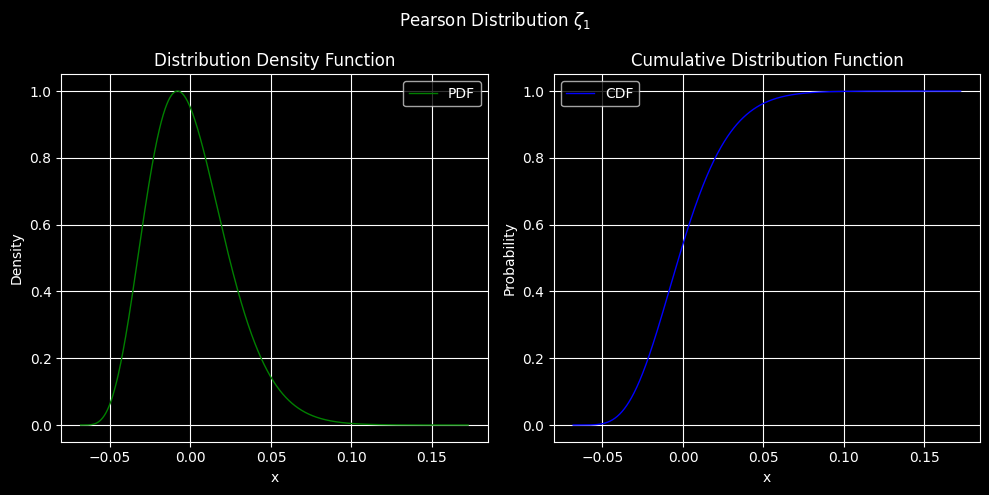

iteration: 0, x0 =   -0.0568658
iteration: 1, x0 =   -0.0597226
iteration: 2, x0 =   -0.0618349
iteration: 3, x0 =   -0.0634399
iteration: 4, x0 =   -0.0646810
iteration: 5, x0 =   -0.0656522
iteration: 6, x0 =   -0.0664188
iteration: 7, x0 =   -0.0670277
iteration: 8, x0 =   -0.0675136
iteration: 9, x0 =   -0.0679028
iteration: 10, x0 =   -0.0682154
iteration: 0, x0 =    0.0405026
iteration: 1, x0 =    0.0601267
iteration: 2, x0 =    0.0761972
iteration: 3, x0 =    0.0905796
iteration: 4, x0 =    0.1039096
iteration: 5, x0 =    0.1164954
iteration: 6, x0 =    0.1285111
iteration: 7, x0 =    0.1400631
iteration: 8, x0 =    0.1512191
iteration: 9, x0 =    0.1620227
iteration: 10, x0 =    0.1725015
roots: [ 0.99057443 -0.81295081 -0.03245232  0.01623191]


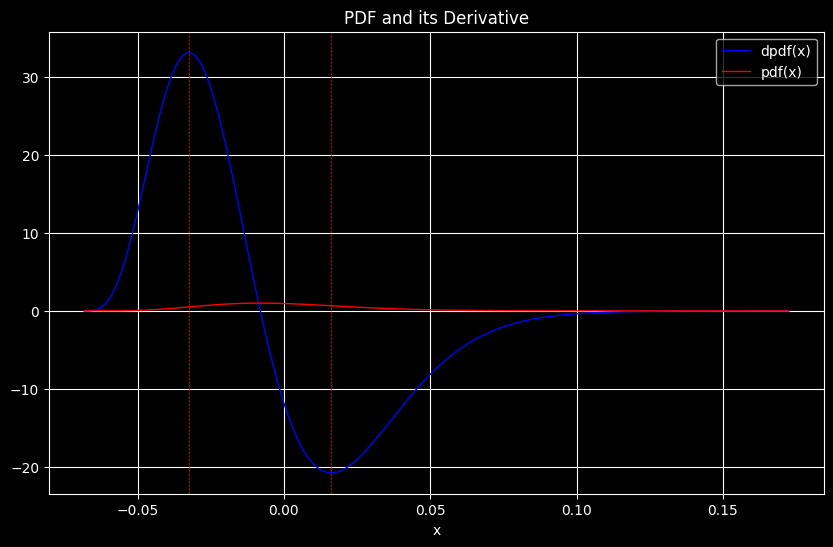

pdf(-0.0682154) = 1.31e-07, pdf(0.1725015) = 7.60e-06


In [20]:
txt = "0,0.000626977,9.84695e-06,1.39051e-06,6.74542e-08,6.83944e-09,5.6161e-10,5.89819e-11"

lines = [line.strip() for line in txt.split(',')]
mu = [float(line) for line in lines]
pearson = Pearson8(mu)
pprint(pearson.pfd) # print(pearson.mom)
print(f'a = {pearson.coef[0]:.7f}, scale = {pearson.pdf_obj.scale:.7f}')
print(f'type = {pearson.pdf_obj.pfd['type']}, isMax: {pearson.pdf_obj.is_max}')

lbub = pearson.determine_bounds()
x = np.linspace(lbub[0], lbub[1], 1000)

pdf = pearson.pdf_obj.pdf(x); title = r'Pearson Distribution $\zeta_1$'
plot_pdf_cdf(x, pdf, title)
dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.pdf_obj); roots = support8.pdf_obj.ddpdf_roots()
print(f'roots: {roots}')
plot_dpdf_pdf(x, dpdf, pdf, title, roots)
print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')

## A Possible Failure Case

C++ version reports error for the following case. However, Python version goes well.

In [21]:
jmom_tr = joint_mom_tr
degree = 4
# par = {'h': 0.0530850, 'v0': 0.1168369, 'k': 3.46, 'theta': 0.008, 'sigma': 0.14, 'rho': -0.82, 'mu': 0.0789}
par = {'h': 0.0589785, 'v0': 0.0658300, 'k': 3.46, 'theta': 0.008, 'sigma': 0.14, 'rho': -0.82, 'mu': 0.0789}
jmom = comp_joint_moms_mat(par)

mu_d1 = [jmom_tr(i, 0, jmom) for i in range(1, 2 * degree + 1)]
mu_d2 = [jmom_tr(0, i, jmom) for i in range(1, 2 * degree + 1)]
mu_d1d2 = [[jmom_tr(i, j, jmom) for j in range(degree + 1)] for i in range(degree + 1)]

print(mu_d1)
print(jmom[0][1:9])
print(mu_d2)

[0.0, 0.003557060665178103, 4.237916488898847e-05, 3.863327475858997e-05, 1.5209124498800004e-06, 7.294049957892132e-07, 5.831802935946009e-08, 2.0472658040369088e-08]
[0.0, 0.0029031346074414105, 3.2378182714500275e-05, 2.576713852404655e-05, 9.489806540684952e-07, 3.9872183509332323e-07, 2.9754118295346083e-08, 9.205892314990702e-09]
[0.0, 1.0054841454575515e-05, -1.9015477148413167e-09, 3.053794429651443e-10, -1.9137245802041796e-13, 1.5599559620632154e-14, -2.0321217068414673e-17, 1.049768297946147e-18]


### Pearson Density Approximation ($\zeta_1 = x_1$): $I_t$

{'A1': np.float64(-56.29430848881155),
 'A2': np.float64(-72.54950820481201),
 'A3': np.float64(128.8438166936236),
 'B3': np.float64(177.18480792084185),
 'type': 44,
 'x1': np.float64(-0.5062835281120496),
 'x2': np.float64(1.8823139870111052),
 'x3': np.complex128(-0.2682501060755671+1.5205517706074971j)}
a = 0.0059699, scale = -64.7726063
type = 44, isMax: True
iteration: 0, x0 =   -0.1249274
iteration: 1, x0 =   -0.1485050
iteration: 2, x0 =   -0.1671331
iteration: 3, x0 =   -0.1828657
iteration: 4, x0 =   -0.1966217
iteration: 5, x0 =   -0.2089122
iteration: 6, x0 =   -0.2200580
iteration: 7, x0 =   -0.2302763
iteration: 8, x0 =   -0.2397232
iteration: 9, x0 =   -0.2485147
iteration: 10, x0 =   -0.2567405
iteration: 0, x0 =    0.1129684
iteration: 1, x0 =    0.1485277
iteration: 2, x0 =    0.1772203
iteration: 3, x0 =    0.2023085
iteration: 4, x0 =    0.2250543
iteration: 5, x0 =    0.2461131
iteration: 6, x0 =    0.2658788
iteration: 7, x0 =    0.2846111
iteration: 8, x0 =    0

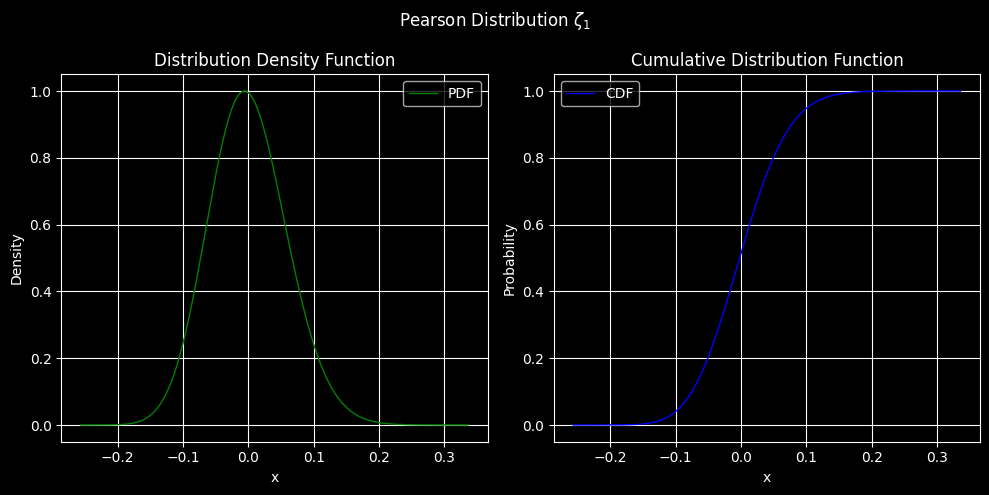

iteration: 0, x0 =   -0.1249274
iteration: 1, x0 =   -0.1485050
iteration: 2, x0 =   -0.1671331
iteration: 3, x0 =   -0.1828657
iteration: 4, x0 =   -0.1966217
iteration: 5, x0 =   -0.2089122
iteration: 6, x0 =   -0.2200580
iteration: 7, x0 =   -0.2302763
iteration: 8, x0 =   -0.2397232
iteration: 9, x0 =   -0.2485147
iteration: 10, x0 =   -0.2567405
iteration: 0, x0 =    0.1129684
iteration: 1, x0 =    0.1485277
iteration: 2, x0 =    0.1772203
iteration: 3, x0 =    0.2023085
iteration: 4, x0 =    0.2250543
iteration: 5, x0 =    0.2461131
iteration: 6, x0 =    0.2658788
iteration: 7, x0 =    0.2846111
iteration: 8, x0 =    0.3024921
iteration: 9, x0 =    0.3196553
iteration: 10, x0 =    0.3362023
-a = -0.005969896924048438
[ 14.84380299 -14.28012662  -0.06544865   0.05349925]


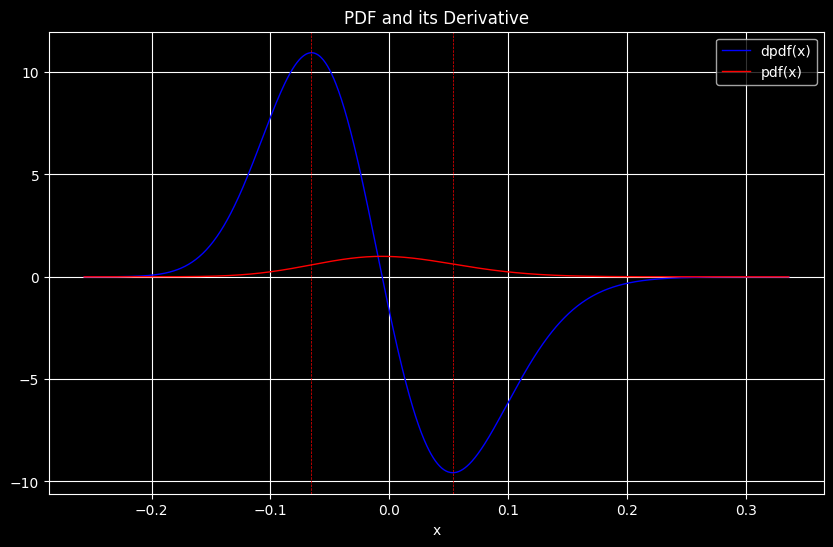

pdf(-0.2567405) = 2.46e-06, pdf(0.3362023) = 5.03e-06


In [22]:
pearson = Pearson8(mu_d1)
pprint(pearson.pfd) # print(pearson.mom)
print(f'a = {pearson.coef[0]:.7f}, scale = {pearson.pdf_obj.scale:.7f}')
print(f'type = {pearson.pdf_obj.pfd['type']}, isMax: {pearson.pdf_obj.is_max}')
lbub = pearson.determine_bounds()

x = np.linspace(lbub[0], lbub[1], 1000)

pdf = pearson.pdf(x); title = r'Pearson Distribution $\zeta_1$'
plot_pdf_cdf(x, pdf, title)
dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.pdf_obj); roots = support8.pdf_obj.ddpdf_roots()
print(f'-a = {-pearson.coef[0]}')
print(roots)
plot_dpdf_pdf(x, dpdf, pdf, title, roots)

print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')

### Pearson Density Approximation ($x_2$): $dI\!E_t$

{'A1': np.float64(-52.105942689429064),
 'A2': np.float64(-67.10200870867324),
 'A3': np.float64(119.20795139810232),
 'B3': np.float64(141.5133462017576),
 'type': 44,
 'x1': np.float64(-0.44081185733122186),
 'x2': np.float64(1.6343763985384145),
 'x3': np.complex128(-0.22990213155184225+1.3179344478866004j)}
a = 0.0055893, scale = -59.3605429
type = 44, isMax: True
iteration: 0, x0 =   -0.1130382
iteration: 1, x0 =   -0.1341223
iteration: 2, x0 =   -0.1507702
iteration: 3, x0 =   -0.1648169
iteration: 4, x0 =   -0.1770857
iteration: 5, x0 =   -0.1880356
iteration: 6, x0 =   -0.1979546
iteration: 7, x0 =   -0.2070384
iteration: 8, x0 =   -0.2154272
iteration: 9, x0 =   -0.2232255
iteration: 10, x0 =   -0.2305142
iteration: 0, x0 =    0.1018399
iteration: 1, x0 =    0.1341452
iteration: 2, x0 =    0.1602193
iteration: 3, x0 =    0.1830277
iteration: 4, x0 =    0.2037156
iteration: 5, x0 =    0.2228768
iteration: 6, x0 =    0.2408680
iteration: 7, x0 =    0.2579243
iteration: 8, x0 =  

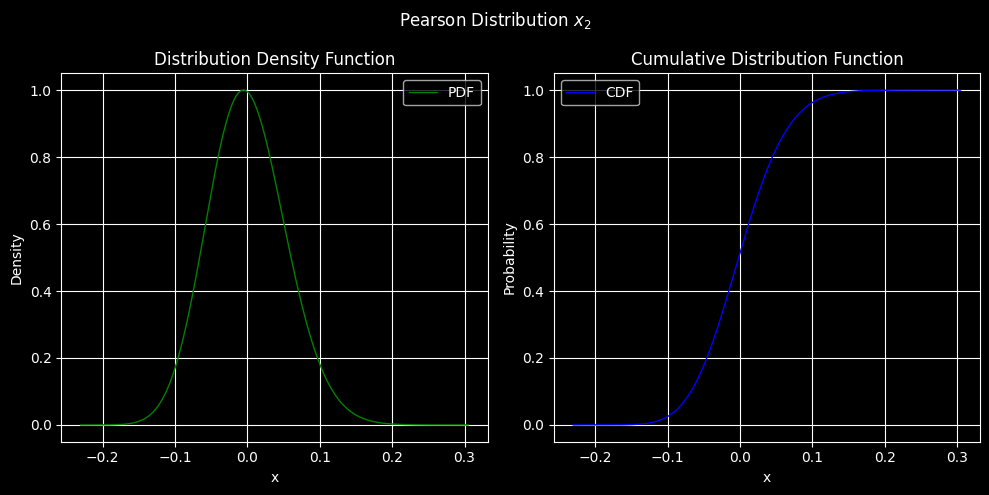

iteration: 0, x0 =   -0.1130382
iteration: 1, x0 =   -0.1341223
iteration: 2, x0 =   -0.1507702
iteration: 3, x0 =   -0.1648169
iteration: 4, x0 =   -0.1770857
iteration: 5, x0 =   -0.1880356
iteration: 6, x0 =   -0.1979546
iteration: 7, x0 =   -0.2070384
iteration: 8, x0 =   -0.2154272
iteration: 9, x0 =   -0.2232255
iteration: 10, x0 =   -0.2305142
iteration: 0, x0 =    0.1018399
iteration: 1, x0 =    0.1341452
iteration: 2, x0 =    0.1602193
iteration: 3, x0 =    0.1830277
iteration: 4, x0 =    0.2037156
iteration: 5, x0 =    0.2228768
iteration: 6, x0 =    0.2408680
iteration: 7, x0 =    0.2579243
iteration: 8, x0 =    0.2742105
iteration: 9, x0 =    0.2898473
iteration: 10, x0 =    0.3049268
-a = -0.0055893009736449634
[ 12.38784995 -11.89494036  -0.05931377   0.0481253 ]


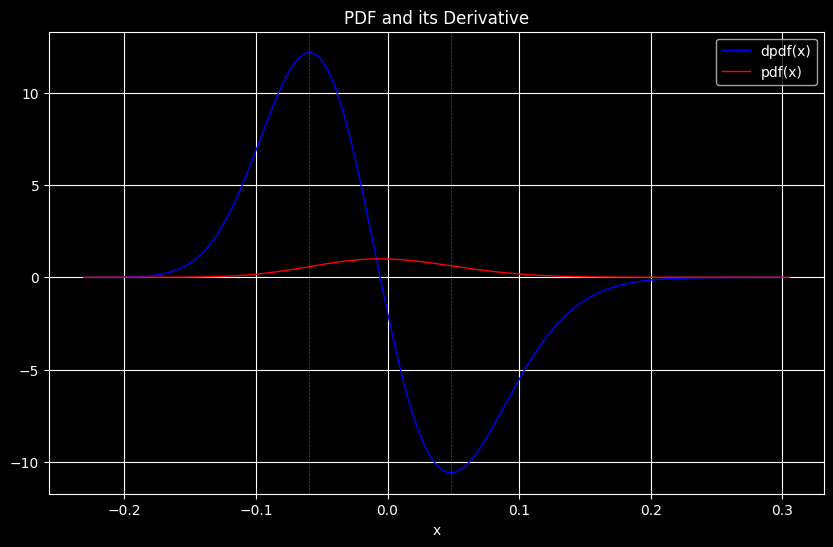

pdf(-0.2305142) = 2.41e-06, pdf(0.3049268) = 5.08e-06


In [23]:
mu_x2 = jmom[0][1:9]
pearson = Pearson8(mu_x2)

pprint(pearson.pfd) # print(pearson.mom)
print(f'a = {pearson.coef[0]:.7f}, scale = {pearson.pdf_obj.scale:.7f}')
print(f'type = {pearson.pdf_obj.pfd['type']}, isMax: {pearson.pdf_obj.is_max}')
lbub = pearson.determine_bounds()

# lbub_x2 = (-0.0570461, 0.3)
x = np.linspace(lbub[0], lbub[1], 1000)

pdf = pearson.pdf(x); title = r'Pearson Distribution $x_2$'
plot_pdf_cdf(x, pdf, title)

dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.pdf_obj); roots = support8.pdf_obj.ddpdf_roots()
print(f'-a = {-pearson.coef[0]}')
print(roots)
plot_dpdf_pdf(x, dpdf, pdf, title, roots)

print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')

### Pearson Density Approximation ($\zeta_2$): $dI\!E_t + c I_t$

The transformed variable $\zeta_2 = dI\!E_t + c I_t$,

$c = -\frac{\mathrm{cov}(I_t, dI\!E_t)}{\mathrm{var}(I_t)} = -0.9018505$

$\mathrm{cov}(\zeta_1, \zeta_2) = \mathrm{cov}(I_t, dI\!E_t + c I_t) = \mathrm{cov}(I_t, dI\!E_t) + c \times\mathrm{var}(I_t) = 0$

In [24]:
def compute_c(muMatrix):
    mu = muMatrix
    m1 = mu[1][0]
    m2 = mu[0][1]
    cov = mu[1][1] - m1 * m2
    var = mu[2][0] - m1 ** 2
    c = - cov / var
    return c

c = compute_c(jmom)
print(f"c = {compute_c(jmom):.7f}")
print(rf"The transformed variable $\zeta_2 = c I_t + dI\!E_t$, $c = {c:.7f}$")

c = -0.9018505
The transformed variable $\zeta_2 = c I_t + dI\!E_t$, $c = -0.9018505$


{'A1': np.float64(-22.098796337909924),
 'A2': np.float64(22.098796337909924),
 'B1': np.float64(-4.698275095688352),
 'B2': np.float64(2.0238833594908825),
 'type': 42,
 'x1': np.complex128(-0.03767658785871662+0.04044122961236975j),
 'x2': np.complex128(0.022833308139773096+0.028335861386426606j)}
a = -0.0000958, scale = 141.4532683
type = 42, isMax: True
iteration: 0, x0 =   -0.0062139
iteration: 1, x0 =   -0.0079044
iteration: 2, x0 =   -0.0092636
iteration: 3, x0 =   -0.0104441
iteration: 4, x0 =   -0.0115071
iteration: 5, x0 =   -0.0124851
iteration: 6, x0 =   -0.0133979
iteration: 7, x0 =   -0.0142586
iteration: 8, x0 =   -0.0150764
iteration: 9, x0 =   -0.0158582
iteration: 10, x0 =   -0.0166093
iteration: 0, x0 =    0.0064026
iteration: 1, x0 =    0.0079046
iteration: 2, x0 =    0.0091080
iteration: 3, x0 =    0.0101459
iteration: 4, x0 =    0.0110741
iteration: 5, x0 =    0.0119227
iteration: 6, x0 =    0.0127105
iteration: 7, x0 =    0.0134497
iteration: 8, x0 =    0.0141492

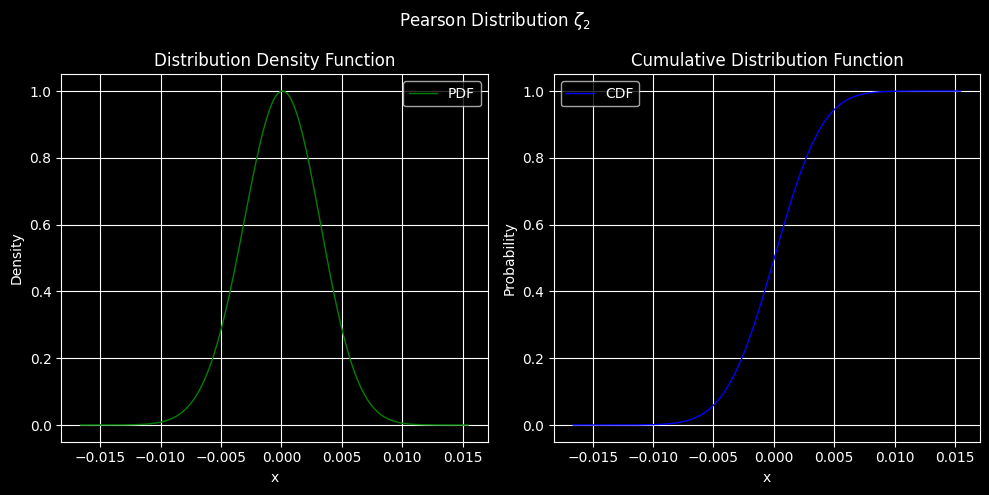

iteration: 0, x0 =   -0.0062139
iteration: 1, x0 =   -0.0079044
iteration: 2, x0 =   -0.0092636
iteration: 3, x0 =   -0.0104441
iteration: 4, x0 =   -0.0115071
iteration: 5, x0 =   -0.0124851
iteration: 6, x0 =   -0.0133979
iteration: 7, x0 =   -0.0142586
iteration: 8, x0 =   -0.0150764
iteration: 9, x0 =   -0.0158582
iteration: 10, x0 =   -0.0166093
iteration: 0, x0 =    0.0064026
iteration: 1, x0 =    0.0079046
iteration: 2, x0 =    0.0091080
iteration: 3, x0 =    0.0101459
iteration: 4, x0 =    0.0110741
iteration: 5, x0 =    0.0119227
iteration: 6, x0 =    0.0127105
iteration: 7, x0 =    0.0134497
iteration: 8, x0 =    0.0141492
iteration: 9, x0 =    0.0148156
iteration: 10, x0 =    0.0154538
-a = 9.581783847949297e-05
[ 0.0032492  -0.00305904]


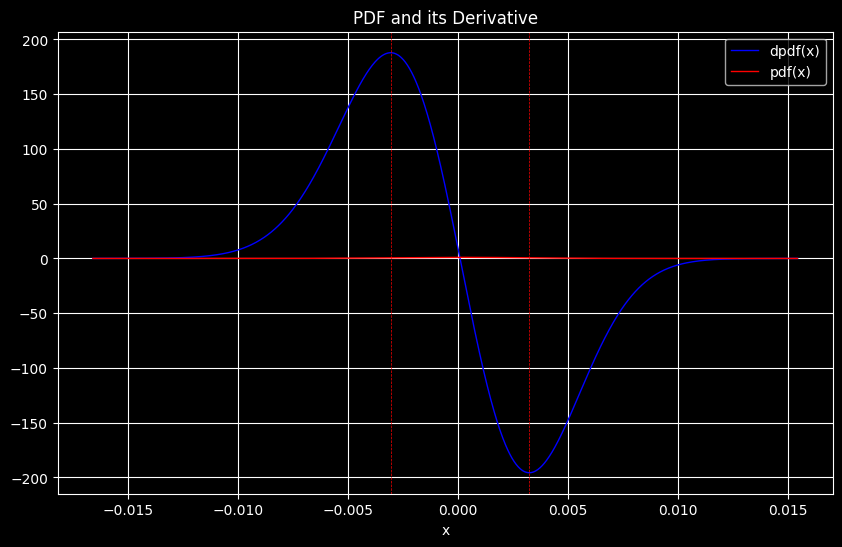

pdf(-0.0166093) = 4.27e-06, pdf(0.0154538) = 3.56e-06


In [25]:
pearson = Pearson8(mu_d2)
pprint(pearson.pfd)
print(f'a = {pearson.coef[0]:.7f}, scale = {pearson.pdf_obj.scale:.7f}')
print(f'type = {pearson.pdf_obj.pfd['type']}, isMax: {pearson.pdf_obj.is_max}')
lbub = pearson.determine_bounds()

# lbub2 = (-0.1911959, 0.1937401)
x = np.linspace(lbub[0], lbub[1], 1000)

pdf = pearson.pdf(x); title = r'Pearson Distribution $\zeta_2$'
plot_pdf_cdf(x, pdf, title)

dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.pdf_obj); roots = support8.pdf_obj.ddpdf_roots()
print(f'-a = {-pearson.coef[0]}')
print(roots)
plot_dpdf_pdf(x, dpdf, pdf, title, roots)

print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')